## Tutorials


### First of all, let's provide input data. We can begin with sets of words and simulated meanings (as the example shows), or use other types of data.

In [5]:
## Provide your own words and meanings data
"""
The data should be in the dictionary form of {word_1:(initial frequency of word_1, [(meaning_1 of word_1, initial frequency of
meaning_1,fitness of meaning_1),...(meaning_n of word_1, initial frequency of meaning_n,fitness of meaning_n)]),..., word_n:...}
"""
words_meanings = {'apple':(0.3,[('red',0.15,20),('fruit',0.6,30),('eatable',0.25,5)]),\
                  'tomato':(0.8,[('red',0.3,20),('fruit',0.3,40),('vegetable',0.4,15)])}

### Implementing a Contextual Geometric Structure (CGS) in software.

#### The easiest way to implement CGS is using Python-based widgets tools. 

In [1]:
## Import all the required packages
import numpy as np
from CGS_parcels.CGS_notebook_tool import CGS_field_initializer

c:\users\user\documents\parcels_package\cgs_venv\lib\site-packages\pandas\_libs\__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
c:\users\user\documents\parcels_package\cgs_venv\lib\site-packages\pandas\__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import (hashtable as _hashtable,
c:\users\user\documents\parcels_package\cgs_venv\lib\site-packages\pandas\core\dtypes\common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos, lib
c:\users\user\documents\parcels_package\cgs_venv\lib\site-packages\pandas\core\util\hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import hashing, tslib
c:\users\user\d

In [2]:
## Initialize CGS_field_initializer
CGS_tool = CGS_field_initializer()
CGS_tool.display()

Q0dTX2ZpZWxkX2luaXRpYWxpemVyKGNoaWxkcmVuPShTZWxlY3QoZGVzY3JpcHRpb249dSdTZWxlY3QgYSBmaWVsZCBzZXR0aW5nOiAnLCBvcHRpb25zPSgncmFuZG9tJywgJ3ZvcnRleCcsICfigKY=


In [6]:
CGS_tool.build(words_meanings)

In [9]:
CGS_tool.table()

,time,"(apple, eatable)","(apple, fruit)","(apple, red)","(tomato, fruit)","(tomato, red)","(tomato, vegetable)"
0,300.0,0.033333,0.033333,0.033333,0.166667,0.100000,0.133333
1,600.0,0.033333,0.033333,0.033333,0.166667,0.100000,0.133333
2,900.0,0.033333,0.033333,0.033333,0.166667,0.100000,0.133333
3,1200.0,0.033333,0.033333,0.033333,0.166667,0.100000,0.133333
4,1500.0,NaN,0.066667,0.033333,0.333333,0.066667,NaN
5,1800.0,NaN,0.066667,0.033333,0.333333,0.066667,NaN
6,2100.0,NaN,0.066667,0.033333,0.333333,0.066667,NaN
7,2400.0,NaN,0.066667,0.033333,0.333333,0.066667,NaN
8,2700.0,NaN,0.066667,0.033333,0.333333,0.066667,NaN
9,3000.0,NaN,0.066667,0.033333,0.166667,0.233333,NaN


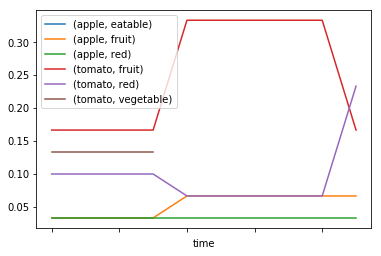

In [7]:
CGS_tool.plot()

In [8]:
CGS_tool.animate()

### Implementing CGS Using an API

#### Another way to implement CGS is through the use of an API.

In [3]:
## Import all the required packages
import numpy as np
from CGS_parcels.fieldset import CGS_field
from CGS_parcels.kernel import kernel

In [6]:
## Determine the flow velocities within the field.
""" 
An easy example here is through random initialization.
The velocities are suggested to be within the range from 1e-4 to 1e-3.
"""
x_vel = np.random.uniform(-1.0,1.0,[10,10])*5e-4
y_vel = np.random.uniform(-1.0,1.0,[10,10])*5e-4

## Determine the initial positions of particles within the field.
""" 
An easy example here is through random initialization.
The positions are restricted to be within the range from 0 to 1.
"""
particle_num = 30
xpos = np.random.rand(particle_num)
ypos = np.random.rand(particle_num)

## Initialize CGS_fieldset
cgs = CGS_field(x_vel,y_vel)
cgs.deploy_kernels(xpos,ypos,kernel)
## Feed the data of words and meanings into kernel_set
kset = cgs.kset
kset.set_kernel(words_meanings)

## Do simulation
output_filename = 'testing' # Could provide the full path.
sim_len = 50 # Total time length for simulation.
sim_period = 5 # Time period for simulation.
collision_thres = 1e-4 # The threshold below which the distance between two particles are considered as collision.
mutation_period = 5 # The period for mutations to happen. If the value is 2, mutations happen every 2 sim_period.
cgs.simulate(sim_len,sim_period,output_filename,collision_thres,mutation_period)

In [8]:
## Animation of the simulation
animation_interval = 100 # Default to be 200
cgs.plot_trajectories(output_filename,animation_interval)

In [9]:
## Table of the simulation results
cgs.word_freq_table()

,time,"(apple, eatable)","(apple, fruit)","(apple, red)","(tomato, fruit)","(tomato, red)","(tomato, vegetable)"
0,300.0,0.066667,0.100000,0.000000,0.100000,0.133333,0.2
1,600.0,0.066667,0.100000,0.000000,0.100000,0.133333,0.2
2,900.0,0.066667,0.100000,0.000000,0.100000,0.133333,0.2
3,1200.0,0.066667,0.100000,0.000000,0.100000,0.133333,0.2
4,1500.0,NaN,0.033333,0.133333,0.366667,0.066667,NaN
5,1800.0,NaN,0.033333,0.133333,0.366667,0.066667,NaN
6,2100.0,NaN,0.033333,0.133333,0.366667,0.066667,NaN
7,2400.0,NaN,0.033333,0.133333,0.366667,0.066667,NaN
8,2700.0,NaN,0.033333,0.133333,0.366667,0.066667,NaN
9,3000.0,NaN,0.100000,0.066667,0.300000,0.133333,NaN


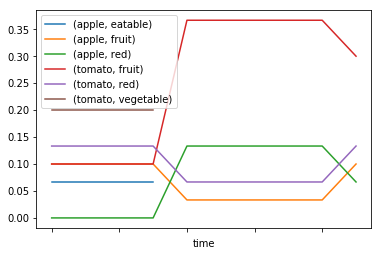

In [10]:
## Plot the simulation results
cgs.plot_wordfreq()